In [1]:
import pandas as pd
import re
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

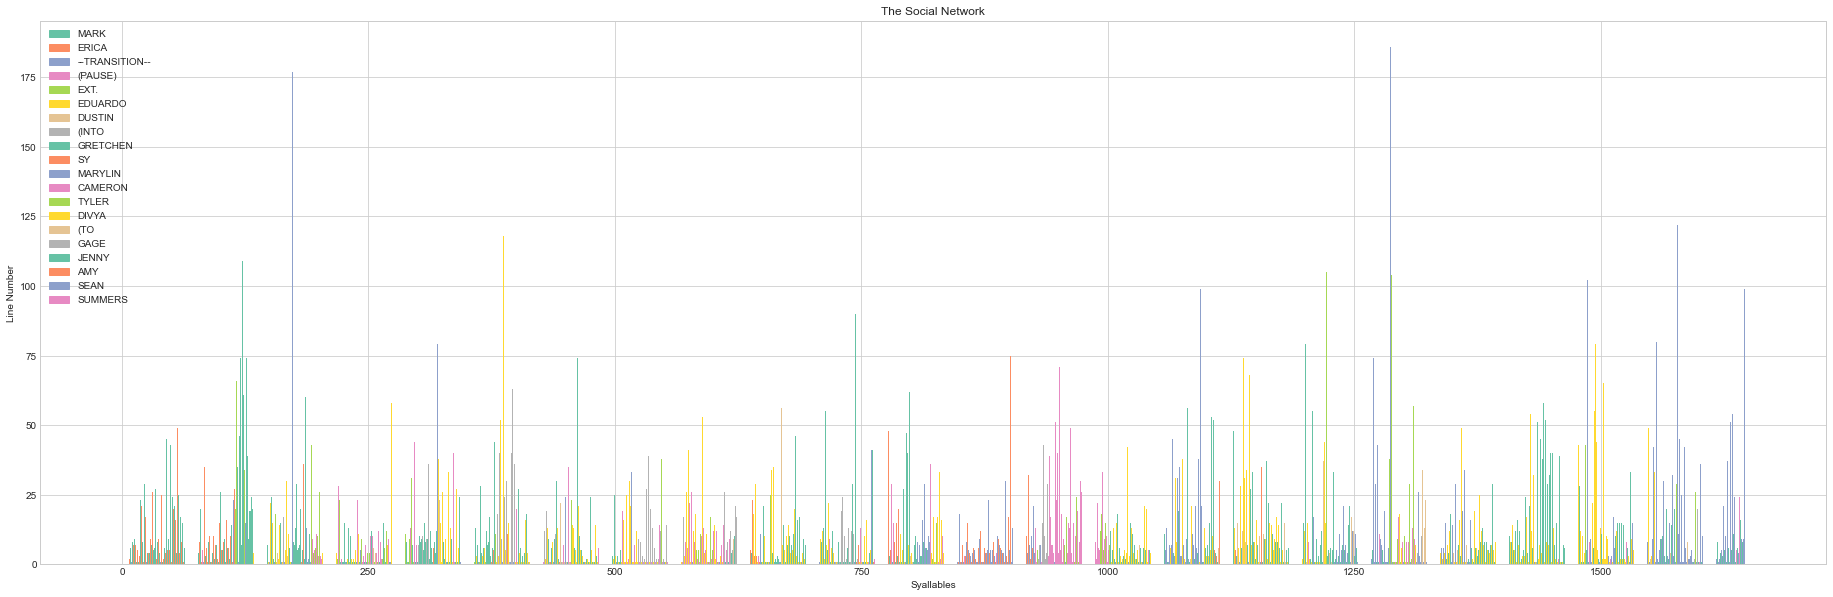

In [2]:
tp = TranscriptPlotter('./test.txt')
tp.parse()
tp.plot()

In [19]:
df = pd.DataFrame({'person': tp.title_list, 'lines': tp.content_list})

# remove things with parentheses like (PAUSE), (BREAK), and other cut off phrases
df = df[~df['person'].str.contains(r'^\(.*\)$')]
# remove page numbers
df = df[~df['person'].str.contains(r'\d+\.')]
# remove indicators that end with :
df = df[~df['person'].str.endswith(':')]
# take first word of each title phrase (cleans things like 'Mark (V.O)', replaces with 'Mark')
df['person'] = df['person'].apply(lambda p: p.strip().split(' ')[0])
# remove common non-character operations, which all end with . for the fist word (like INT.)
df = df[~df['person'].str.endswith('.')]
# if not in top 20 list of chars, then don't include, used to exclude any outliers
top_20 = df['person'].value_counts()[:20]
df = df[df['person'].isin(top_20.keys())]
df

,person,lines
2,MARK,Did you know there are more people with\n ...
3,ERICA,That can't be true.
4,MARK,it is true.
5,ERICA,What would account for that?
9,MARK,How do you distinguish yourself in a\n ...
...,...,...
2561,MARYLIN,And blogging.
2563,MARK,Would anyone mind it I stayed and used\n ...
2564,MARYLIN,No. There's a night guy downstairs. Stay\n ...
2565,MARK,"Thanks. I appreciate your help today,"
